In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.io import fits
import healpy as hp
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from astropy import wcs
import matplotlib
import coop_setup_funcs as csf
from astropy.cosmology import Planck15 as cosmo, z_at_value
from astropy import units as u

In [2]:
def get_all_cl_points(filename):
    file      = np.loadtxt(filename)
    theta,phi = file[:,0], file[:,1]
    dec       = []
    ra        = []
    for i in range(len(theta)):
        dec.append(ThetaPhitoDeclRa(theta[i],phi[i])[0])
        ra.append(ThetaPhitoDeclRa(theta[i],phi[i])[1])

    ra        = np.asarray(ra)
    dec       = np.asarray(dec)
    in_region = (ra>lonmin) & (ra < lonmax) & (dec < latmax) & (dec > latmin)
    dec       = dec[in_region]
    ra        = ra[in_region]
    return (ra,dec)
    peakfile.close()
    
def get_peakinfo(filename):
    peakfile = fits.open(filename)
    peakinfo = peakfile[0].data
    rot_angle = peakinfo[:,3]
    theta,phi = peakinfo[:,1], peakinfo[:,2]
    dec = []
    ra  = []
    for i in range(len(theta)):
        dec.append(csf.ThetaPhitoRaDec(theta[i],phi[i])[1])
        ra.append(csf.ThetaPhitoRaDec(theta[i],phi[i])[0])

    ra = np.asarray(ra)
    dec = np.asarray(dec)
    in_region = (ra>pt_lonmin) & (ra < pt_lonmax) & (dec < pt_latmax) & (dec > pt_latmin)
    dec = dec[in_region]
    rot_angle = rot_angle[in_region]
    ra = ra[in_region]
    return (rot_angle,ra,dec)
    peakfile.close()

def get_einfo(filename, ra_h, dec_h):
    ecc_map0 = hp.read_map(filename, field=0)
    ecc_map1 = hp.read_map(filename, field=1)    
    ecc_map2 = hp.read_map(filename, field=2)
    
    pixels = hp.ang2pix(4096, ra_h, dec_h, lonlat=True)
    e = np.sqrt((ecc_map1**2 + ecc_map2**2)/ecc_map0**2)
    return e[pixels]
    
def get_vector_components(rot_angle):
    U_arr = np.zeros(len(rot_angle))
    V_arr = np.zeros(len(rot_angle))
    m = 0
    for r in rot_angle:

        if (r <= np.pi/2.) or (r > 3*np.pi/2.):
            U = 1/np.sqrt(1+np.tan(r)**2)
        else:
            U = -1/np.sqrt(1+np.tan(r)**2)
        V = U * np.tan(r)
        U_arr[m] = U
        V_arr[m] = V
        m += 1
    return U_arr, V_arr

def read_amp_map(amp_file):
    amp_map = fits.open(amp_file)
    amp_map[1].header['TTYPE3'] = 'ID2'
    amp_map.writeto(amp_file, overwrite=True)
    amp_map.close()
    return hp.read_map(amp_file, field=0)

## Find percentage agreement between different smoothing scales

In [3]:
latmin = -2
latmax = 2
lonmin = 12
lonmax = 16

pt_latmin = latmin + 0.1
pt_latmax = latmax - 0.1
pt_lonmin = lonmin + 0.1
pt_lonmax = lonmax - 0.1

In [4]:
# run this if latrange and lonrange cover full area
# ras_6  = []
# ras_14 = []
# ras_18 = []
# for reg in range(12):
#     rot_angle_6, ra_6, dec_6    = get_peakinfo("/mnt/scratch-lustre/mlokken/stacking/ACT+Planck/{0}/ACTxDES_lambdagt10_reg{0}_1632_1832Mpc_nugt2_egtpt3_6pt1_pks.fits".format(reg))
#     ras_6.extend(ra_6)
#     rot_angle_14, ra_14, dec_14 = get_peakinfo("/mnt/scratch-lustre/mlokken/stacking/ACT+Planck/{0}/ACTxDES_lambdagt10_reg{0}_1632_1832Mpc_nugt2_egtpt3_13pt9_pks.fits".format(reg))
#     ras_14.extend(ra_14)
#     rot_angle_18, ra_18, dec_18 = get_peakinfo("/mnt/scratch-lustre/mlokken/stacking/ACT+Planck/{0}/ACTxDES_lambdagt10_reg{0}_1632_1832Mpc_nugt2_egtpt3_17pt8_pks.fits".format(reg))
#     ras_18.extend(ra_18)

In [5]:

reg = 1
rot_angle_14, ra_14, dec_14 = get_peakinfo("/mnt/scratch-lustre/mlokken/stacking/ACT+Planck/{0}/ACTxDES_lambdagt10_reg{0}_1632_1832Mpc_nugt2_egtpt3_13pt9_pks.fits".format(reg))
rot_angle_10, ra_10, dec_10 = get_peakinfo("/mnt/scratch-lustre/mlokken/stacking/ACT+Planck/{0}/ACTxDES_lambdagt10_reg{0}_1632_1832Mpc_nugt2_egtpt3_6pt1_pks.fits".format(reg))
rot_angle_18, ra_18, dec_18 = get_peakinfo("/mnt/scratch-lustre/mlokken/stacking/ACT+Planck/{0}/ACTxDES_lambdagt10_reg{0}_1632_1832Mpc_nugt2_egtpt3_17pt8_pks.fits".format(reg))


NSIDE = 4096
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 4096
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 4096
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


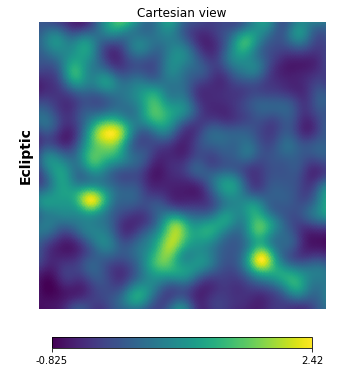

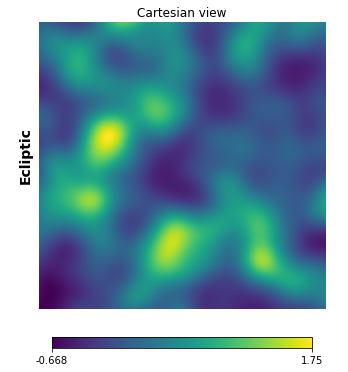

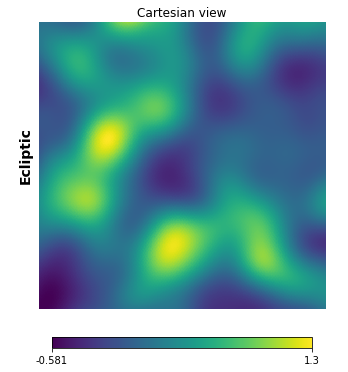

In [6]:
nd_map_smooth_10 = read_amp_map("/mnt/raid-cita/mlokken/data/number_density_maps/200_cmpc_slices/redmagic/overdensity/odmap_distMpc_1632_1832_0Mpc_0arcmin_AMPLITUDE_fwhm19a.fits")
nd_map_flat_10 = hp.cartview(nd_map_smooth_10, latra=[latmin,latmax], lonra=[lonmin,lonmax], return_projected_map=True, coord='E')
nd_map_smooth_14 = read_amp_map("/mnt/raid-cita/mlokken/data/number_density_maps/200_cmpc_slices/redmagic/overdensity/odmap_distMpc_1632_1832_0Mpc_0arcmin_AMPLITUDE_fwhm27a.fits")
nd_map_flat_14 = hp.cartview(nd_map_smooth_14, latra=[latmin,latmax], lonra=[lonmin,lonmax], return_projected_map=True, coord='E')
nd_map_smooth_18 = read_amp_map("/mnt/raid-cita/mlokken/data/number_density_maps/200_cmpc_slices/redmagic/overdensity/odmap_distMpc_1632_1832_0Mpc_0arcmin_AMPLITUDE_fwhm35a.fits")
nd_map_flat_18 = hp.cartview(nd_map_smooth_18, latra=[latmin,latmax], lonra=[lonmin,lonmax], return_projected_map=True, coord='E')


In [7]:
size = (latmax-latmin)
center = 1732*u.Mpc
lent = (cosmo.kpc_comoving_per_arcmin(z_at_value(cosmo.comoving_distance, center))).to(u.Mpc/u.deg)*size*u.deg
print(lent)

120.91641105633379 Mpc


In [8]:
(800-200)/nd_map_flat_10.shape[1]*lent
(800-500)/nd_map_flat_10.shape[1]*lent

<Quantity 45.34365415 Mpc>

In [9]:
w = wcs.WCS(naxis=2)

height = float(nd_map_flat_14.shape[0])
length = float(nd_map_flat_14.shape[1])
w = wcs.WCS(naxis=2)
cdeltaX, crvalX = (lonmin-lonmax)/length, (lonmin+lonmax)/2.
cdeltaY, crvalY = (latmin-latmax)/height, (latmin+latmax)/2.

w.wcs.crpix = length/2., height/2.
print(w.wcs.crpix)
w.wcs.crval = [crvalX,crvalY]
print(w.wcs.crval)
w.wcs.cdelt = np.array([cdeltaX,cdeltaY])
print(w.wcs.cdelt)
w.wcs.ctype = ["RA", "DEC"]

[400. 400.]
[14.  0.]
[-0.005 -0.005]


In [10]:
Xpix_10,Ypix_10 = w.all_world2pix(ra_10,dec_10,0)
Xpix_14,Ypix_14 = w.all_world2pix(ra_14,dec_14,0)
Xpix_18,Ypix_18 = w.all_world2pix(ra_18,dec_18,0)


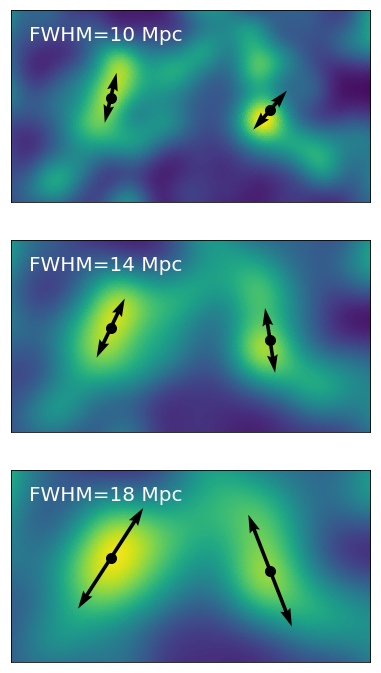

In [13]:
fig,ax = plt.subplots(ncols=1,nrows=3, figsize=[7,12])
list10 = [2,3]
list14 = [1,2]
list18 = [2,3]
U_arr_10, V_arr_10 = get_vector_components(rot_angle_10)
U_arr_14, V_arr_14 = get_vector_components(rot_angle_14)
U_arr_18, V_arr_18 = get_vector_components(rot_angle_18)

ax[0].imshow(nd_map_flat_10[::-1])
ax[1].imshow(nd_map_flat_14[::-1])
ax[2].imshow(nd_map_flat_18[::-1])
fwhm = [10,14,18]
for i in range(3):
    ax[i].set_ylim([800,480])
    ax[i].set_xlim([200,800])
    ax[i].axes.get_xaxis().set_visible(False)
    ax[i].axes.get_yaxis().set_visible(False)
    ax[i].scatter(Xpix_10[list10], Ypix_10[list10], s=100,edgecolor='black', facecolor='black')
    ax[i].text(230,530,"FWHM={:d} Mpc".format(fwhm[i]), fontsize=20, color='white')
ax[0].quiver(Xpix_10[list10], Ypix_10[list10], -U_arr_10[list10], V_arr_10[list10], width=0.01, color = 'k', scale_units = 'inches', scale = 2.8)
ax[0].quiver(Xpix_10[list10], Ypix_10[list10], U_arr_10[list10], -V_arr_10[list10], width=0.01, color = 'k', scale_units = 'inches', scale = 2.8)
ax[1].quiver(Xpix_14[list14], Ypix_14[list14], -U_arr_14[list14], V_arr_14[list14], width=0.01, color = 'k', scale = 2.2, scale_units = 'inches')
ax[1].quiver(Xpix_14[list14], Ypix_14[list14], U_arr_14[list14], -V_arr_14[list14], width=0.01, color = 'k', scale = 2.2, scale_units = 'inches')
ax[2].quiver(Xpix_18[list18], Ypix_18[list18], -U_arr_18[list18], V_arr_18[list18], width=0.01, color = 'k', scale = 1.2, scale_units = 'inches')
ax[2].quiver(Xpix_18[list18], Ypix_18[list18], U_arr_18[list18], -V_arr_18[list18], width=0.01, color = 'k', scale = 1.2, scale_units = 'inches')
ax[2].set_xlabel("90 Mpc")
ax[2].set_ylabel("45 Mpc")
plt.savefig("/home/mlokken/oriented_stacking/plots/three_orientations_three_subplots.png")

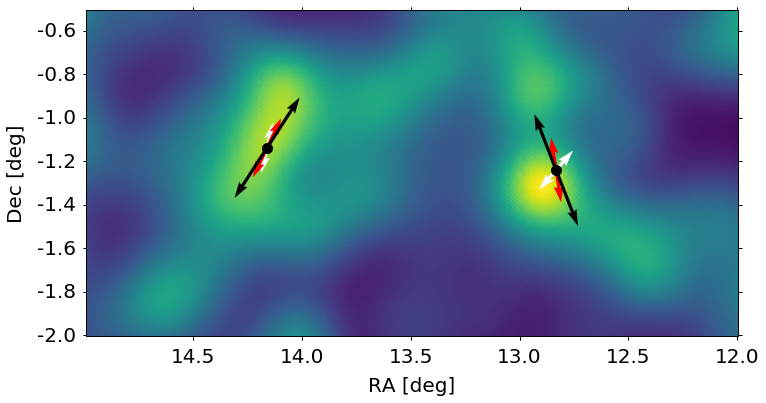

In [13]:


# Make the figure

fig = plt.figure(figsize=(2.1*6,6))
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
nrows = 1
ax1 = plt.subplot(nrows, 1, 1, projection=w)
ax1.imshow(nd_map_flat_10[::-1])
ax1.set_xticks([])
ax1.set_xticklabels([])
U_arr_10, V_arr_10 = get_vector_components(rot_angle_10)
U_arr_14, V_arr_14 = get_vector_components(rot_angle_14)
U_arr_18, V_arr_18 = get_vector_components(rot_angle_18)

list10 = [2,3]
list14 = [1,2]
list18 = [2,3]
ax1.quiver(Xpix_10[list10], Ypix_10[list10], -U_arr_10[list10], V_arr_10[list10], width=0.005, color = 'w', scale_units = 'inches', scale = 2.8)
ax1.quiver(Xpix_10[list10], Ypix_10[list10], U_arr_10[list10], -V_arr_10[list10], width=0.005, color = 'w', scale_units = 'inches', scale = 2.8)
ax1.quiver(Xpix_14[list14], Ypix_14[list14], -U_arr_14[list14], V_arr_14[list14], width=0.005, color = 'r', scale = 2.2, scale_units = 'inches')
ax1.quiver(Xpix_14[list14], Ypix_14[list14], U_arr_14[list14], -V_arr_14[list14], width=0.005, color = 'r', scale = 2.2, scale_units = 'inches')
ax1.quiver(Xpix_18[list18], Ypix_18[list18], -U_arr_18[list18], V_arr_18[list18], width=0.005, color = 'k', scale = 1.2, scale_units = 'inches')
ax1.quiver(Xpix_18[list18], Ypix_18[list18], U_arr_18[list18], -V_arr_18[list18], width=0.005, color = 'k', scale = 1.2, scale_units = 'inches')
ax1.scatter(Xpix_10[list10], Ypix_10[list10], s=100,edgecolor='black', facecolor='black')
ax1.set_ylim([800,500])
ax1.set_xlim([200,800])
plt.xlabel("RA [deg]", fontsize=20)
plt.ylabel("Dec [deg]", fontsize=20)
# plt.savefig("/home/mlokken/oriented_stacking/plots/three_orientations.png")

In [121]:
ra_10

array([14.41406239, 13.97460973, 12.83203093, 14.16137698, 15.12817404,
       15.1940922 , 14.16137698, 14.38110332, 12.4914555 , 14.39208968,
       14.95239229, 14.26025422])

In [122]:
ra_14

array([14.12841791, 12.83203093, 14.16137698, 15.02929681, 15.12817404,
       15.1940922 , 15.16113312, 14.38110332, 14.39208968, 14.95239229])

In [123]:
ra_18

array([14.41406239, 13.97460973, 12.83203093, 14.16137698, 15.02929681,
       15.1940922 , 15.16113312, 14.16137698, 14.39208968, 14.95239229])

In [124]:
np.in1d(ra_10,ra_14)

array([False, False,  True,  True,  True,  True,  True,  True, False,
        True,  True, False])

In [125]:
np.in1d(ra_14,ra_18)

array([False,  True,  True,  True, False,  True,  True, False,  True,
        True])